IMPORTING ALL REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

READING OUR CUSTOMER CHURN DATASET

In [2]:
churn = pd.read_csv('2Customer-Churn-Records.xls.csv')
churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [3]:
report = sv.analyze(churn)

                                             |                                             | [  0%]   00:00 ->…

In [4]:
report.show_html('sweetviz_report.html')

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [5]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [7]:
churn.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [8]:
churn.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

Findings on Dataset:
 - All features data types suitable for analysis.
 - No nulls in dataset.
 - 10,000 unique data points.
 - 13 columns 

In [9]:
churn.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


Statistical Findings on Dataset:
 - Mean of age is 39 
 - Mean of tenure is 5
 - Max Balance is 250898
 - Min Balance is 0
 - Max age is 92
 - Min age is 18
 - Mean of Active Memeber is 51%
 - Scailing is required for machine learning


WRANGLING AND PREPARING OUR DATASET

In [10]:
churn = churn.drop(['RowNumber','CustomerId','Surname'], axis = 1)
churn

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


Data Wrangling and Preparing
 - Dropping the following columns: 'RowNumber','CustomerId','Surname'

The features create unrequired noise in the data for both analysis and modeling

#### EXPLORATORY DATA ANALYSIS

In this section, the dataset will be explored using statistical analysis technqiues such as:
 - Correlation
 - Distribution of the data
    - Categorical
         - churn rate of categorical columns
         - countplots of categorical columns
- Continous
    - Histogram plots for contionous columns
     -  scatter plots
     -  box plots for continous columns

In [11]:
churn.corr(numeric_only=True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.026771,-0.027048,-0.012599,0.000077
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285296,0.283530,-0.000876,0.002222
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.013656,-0.013047,0.008663,-0.010196
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118577,0.119124,-0.002588,0.014608
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047611,-0.046357,-0.011394,-0.015330
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.006976,-0.007095,-0.000212,-0.011041
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156356,-0.154741,0.010236,-0.004983
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012490,0.012494,-0.013747,-0.001515
Exited,-0.026771,0.285296,-0.013656,0.118577,-0.047611,-0.006976,-0.156356,0.012490,1.000000,0.995693,-0.005849,-0.004628
Complain,-0.027048,0.283530,-0.013047,0.119124,-0.046357,-0.007095,-0.154741,0.012494,0.995693,1.000000,-0.004799,-0.002893


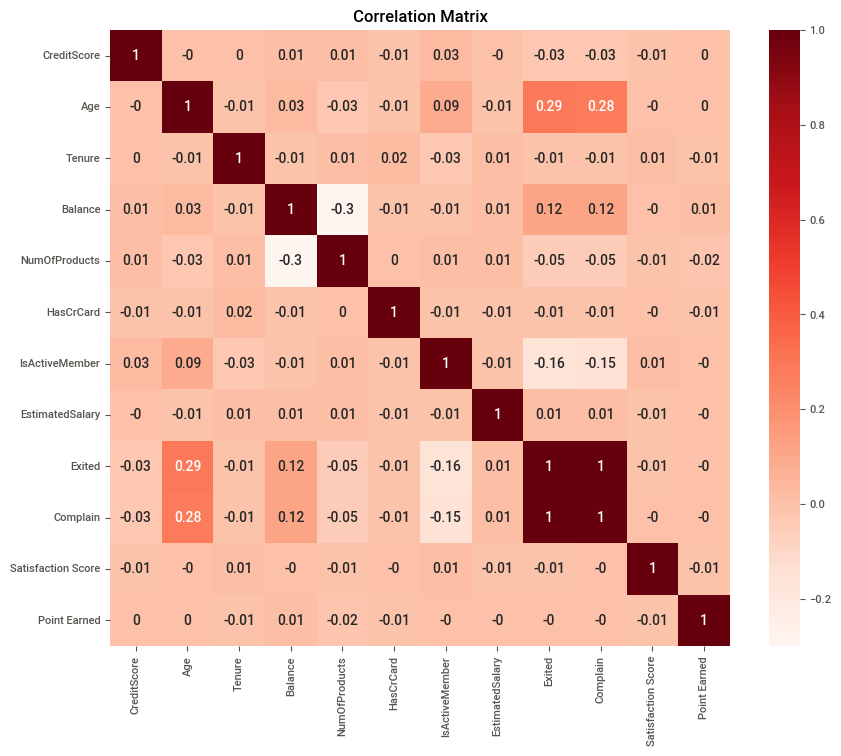

In [12]:
corr = churn.corr(numeric_only = True).round(2)

plt.figure(figsize= (10, 8))
plt.title('Correlation Matrix')
sns.heatmap(data = corr, annot= True, cmap = 'Reds', cbar= True)
plt.show()

In [30]:
corr['Exited'].sort_values(ascending = False)

Exited                1.00
Complain              1.00
Age                   0.29
Balance               0.12
EstimatedSalary       0.01
Point Earned         -0.00
Tenure               -0.01
HasCrCard            -0.01
Satisfaction Score   -0.01
CreditScore          -0.03
NumOfProducts        -0.05
IsActiveMember       -0.16
Name: Exited, dtype: float64

Top correlated features with Exited: Complain, Age, Balance, Is Active Member

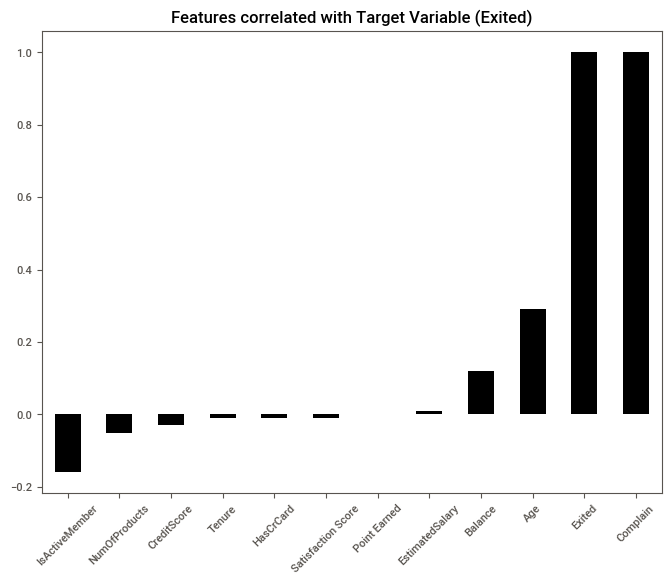

In [31]:
plt.figure(figsize=(8,6))
corr['Exited'].sort_values().plot(kind='bar', color='k')
plt.xticks(rotation=45)
plt.title('Features correlated with Target Variable (Exited)')
plt.show()

ANALYSIS ON CATEGORICAL FEATURES

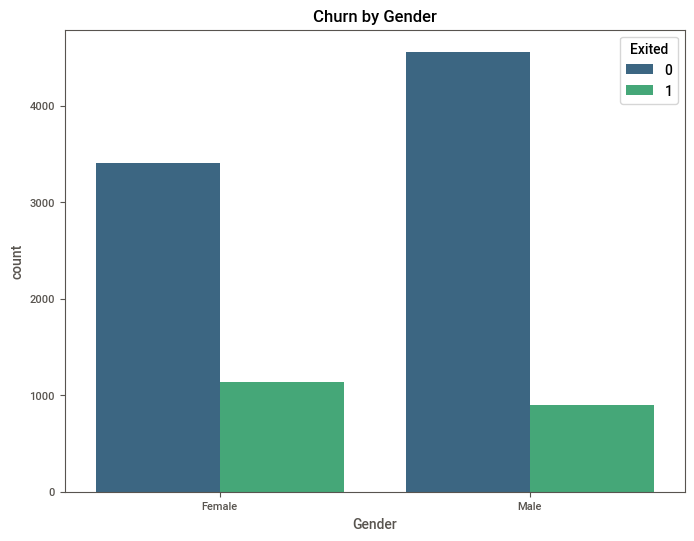

In [32]:
plt.figure(figsize = (8,6))
sns.countplot(data = churn, x = 'Gender', hue = 'Exited', palette = 'viridis')
plt.title('Churn by Gender')
plt.show()

In [33]:
churn_rate_gender = churn.groupby('Gender')['Exited'].mean()*100
print(churn_rate_gender)

Gender
Female    25.071539
Male      16.474253
Name: Exited, dtype: float64


In [34]:
churn['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

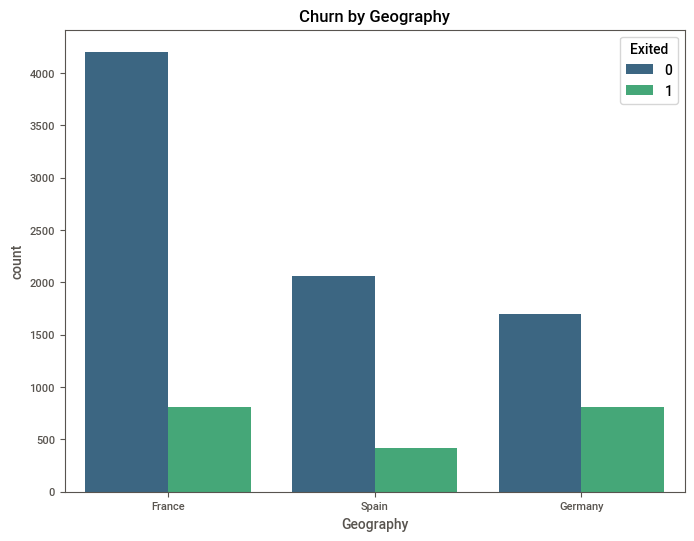

In [35]:
plt.figure(figsize = (8, 6))
sns.countplot(data = churn, x = 'Geography', hue = 'Exited', palette = 'viridis')
plt.title('Churn by Geography')
plt.show()

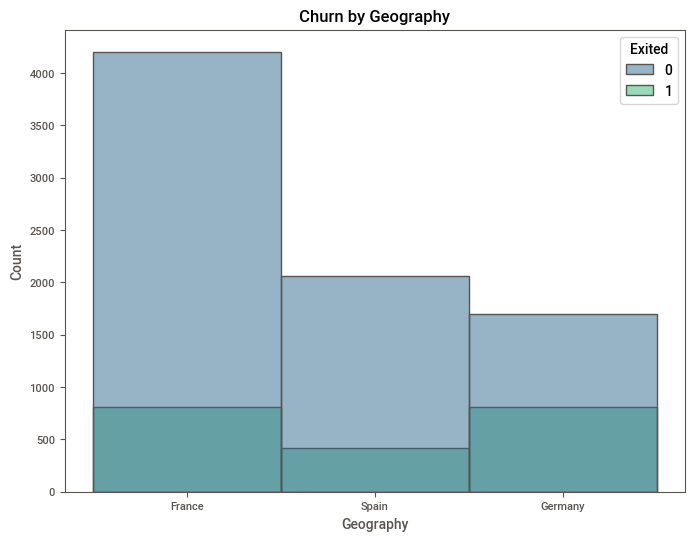

In [36]:
plt.figure(figsize=(8,6))
plt.title('Churn by Geography')
sns.histplot(data = churn, x = 'Geography', hue = 'Exited', palette = 'viridis')
plt.show()

In [37]:
churn_rate_geography = churn.groupby('Geography')['Exited'].mean()*100
print(churn_rate_geography)

Geography
France     16.174711
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64


In [38]:
churn['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [39]:
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,AgeGroup
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,40-49
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,40-49
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,40-49
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,30-39
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,40-49


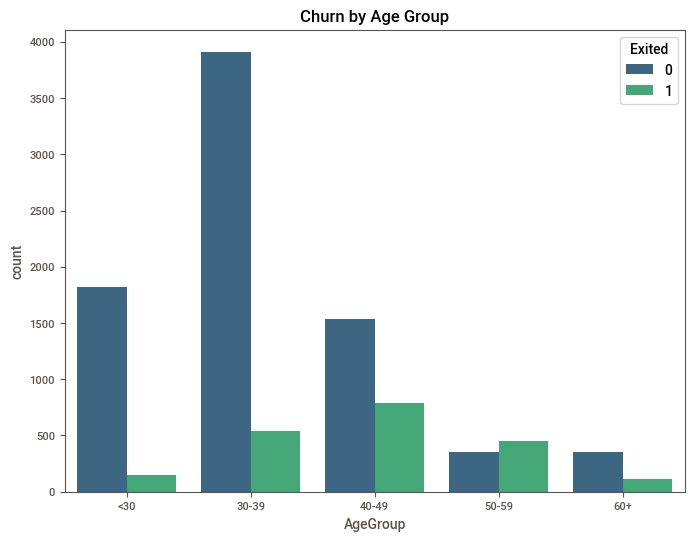

In [40]:
churn['AgeGroup'] = pd.cut(churn['Age'], bins = [0, 30, 40, 50, 60, np.inf],
                        labels = ['<30', '30-39', '40-49', '50-59', '60+'])
plt.figure(figsize = (8,6))
plt.title('Churn by Age Group')
sns.countplot(data = churn, x = 'AgeGroup', hue = 'Exited', palette= 'viridis')
plt.show()

In [41]:
churn_rate_age = churn.groupby('AgeGroup')['Exited'].mean()*100
print(churn_rate_age)

AgeGroup
<30       7.520325
30-39    12.109638
40-49    33.965517
50-59    56.210790
60+      24.784483
Name: Exited, dtype: float64


C:\Users\Ahmed Muzafari\AppData\Local\Temp\ipykernel_6200\82385921.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_age = churn.groupby('AgeGroup')['Exited'].mean()*100


In [42]:
churn['Age'].value_counts()

Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64

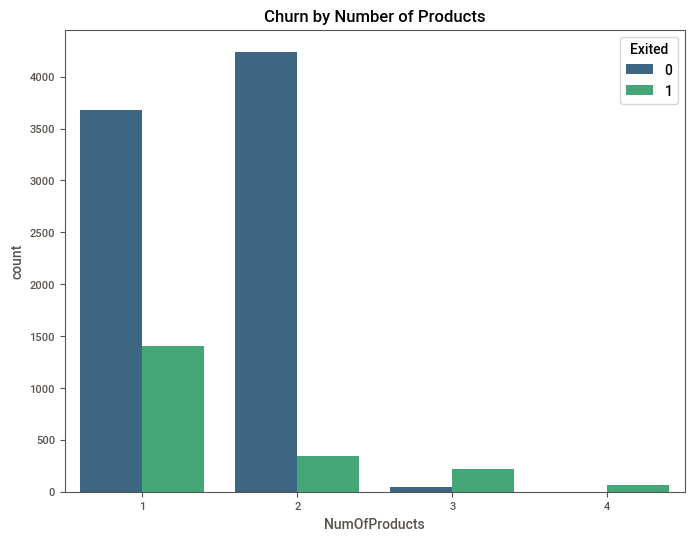

In [43]:
plt.figure(figsize = (8, 6))
sns.countplot(data = churn, x= 'NumOfProducts', hue = 'Exited', palette = 'viridis')
plt.title('Churn by Number of Products')
plt.show()

In [44]:
churn_rate_products = churn.groupby('NumOfProducts')['Exited'].mean()*100
print(churn_rate_products)

NumOfProducts
1     27.714398
2      7.603486
3     82.706767
4    100.000000
Name: Exited, dtype: float64


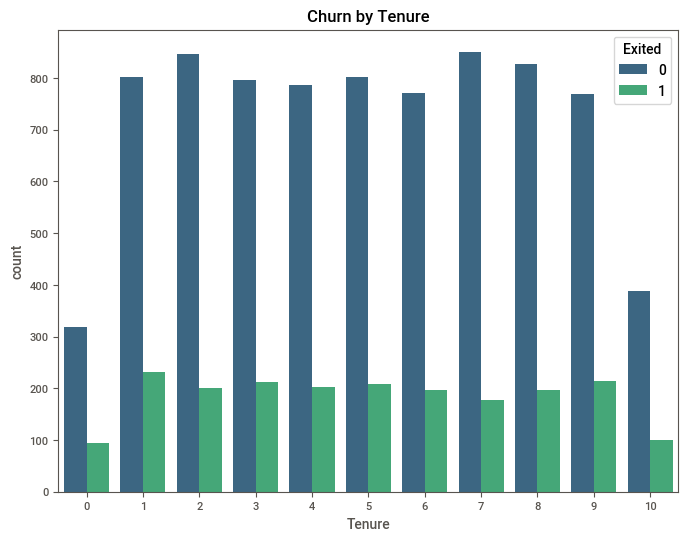

In [45]:
plt.figure(figsize = (8,6))
plt.title('Churn by Tenure')
sns.countplot(data = churn, x = 'Tenure', hue = 'Exited', palette = 'viridis')
plt.show()

In [46]:
churn_rate_tenure = churn.groupby('Tenure')['Exited'].mean()*100
print(churn_rate_tenure)

Tenure
0     23.002421
1     22.415459
2     19.179389
3     21.110010
4     20.525784
5     20.652174
6     20.268873
7     17.217899
8     19.219512
9     21.747967
10    20.612245
Name: Exited, dtype: float64


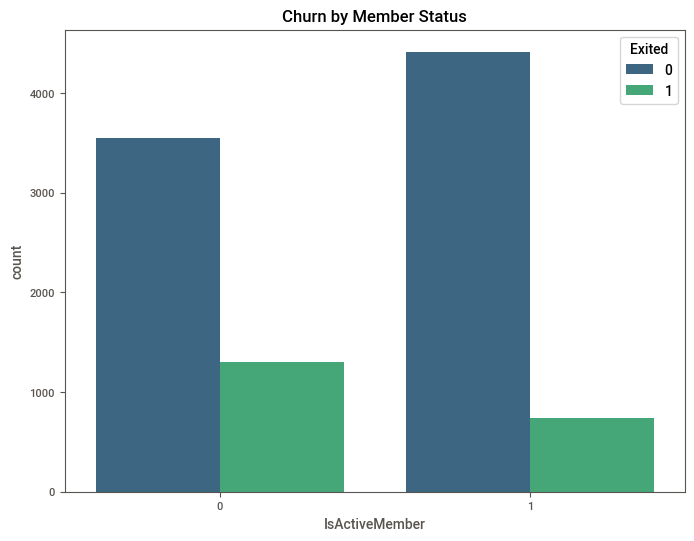

In [47]:
plt.figure(figsize = (8, 6))
sns.countplot(data = churn, x= 'IsActiveMember', hue = 'Exited', palette = 'viridis')
plt.title('Churn by Member Status')
plt.show() 

In [48]:
churn_rate_active_status = churn.groupby('IsActiveMember')['Exited'].mean()*100
print(churn_rate_active_status)

IsActiveMember
0    26.871520
1    14.269074
Name: Exited, dtype: float64


KeyboardInterrupt: 

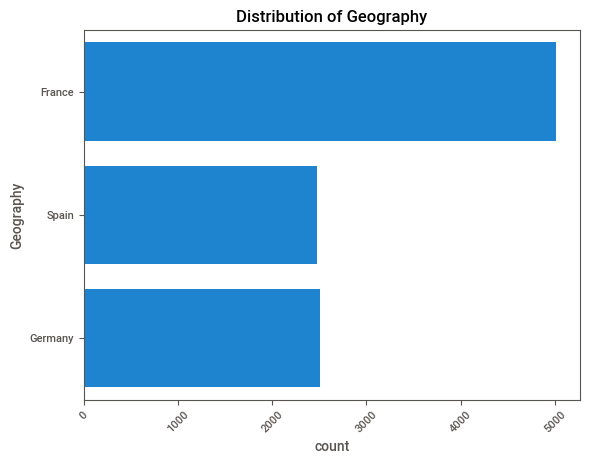

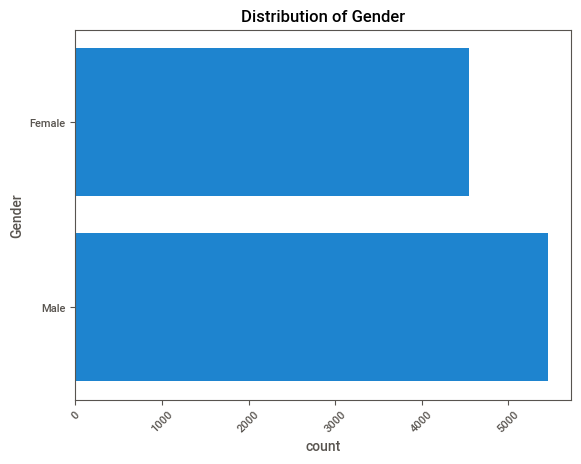

Error in callback <function flush_figures at 0x00000219A4B340E0> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



In [49]:
for columns in churn.columns:
    if churn[columns].nunique()<=4:
        plt.figure()
        sns.countplot(churn[columns])
        plt.title(f'Distribution of {columns}')
        plt.xticks(rotation=45)

# Display all the plots
plt.show()

ANALYSIS ON CONTINIOUS FEATURES

C:\Users\Ahmed Muzafari\AppData\Local\Temp\ipykernel_6200\4012275292.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data = churn, x = 'CreditScore', palette= 'viridis', kde = True)


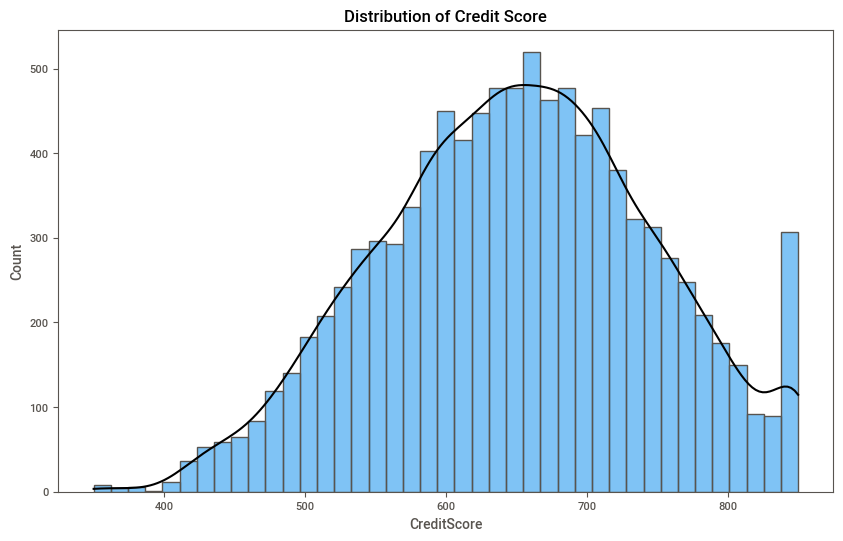

In [50]:
plt.figure(figsize=(10,6))
plt.title('Distribution of Credit Score')
ax = sns.histplot(data = churn, x = 'CreditScore', palette= 'viridis', kde = True)
ax.lines[0].set_color('black')
plt.show()

C:\Users\Ahmed Muzafari\AppData\Local\Temp\ipykernel_6200\4080072710.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data = churn, x = 'Balance', palette= 'viridis', kde = True)


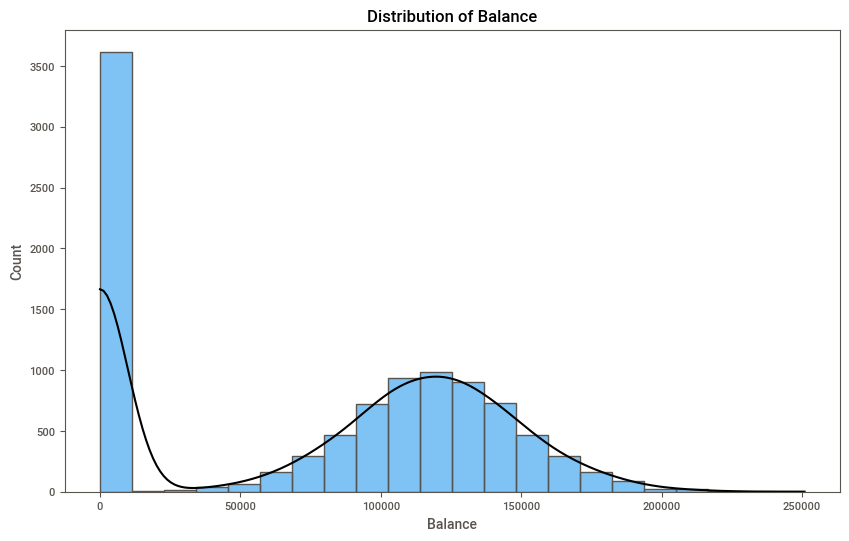

In [51]:
plt.figure(figsize=(10,6))
plt.title('Distribution of Balance')
ax = sns.histplot(data = churn, x = 'Balance', palette= 'viridis', kde = True)
ax.lines[0].set_color('black')
plt.show()

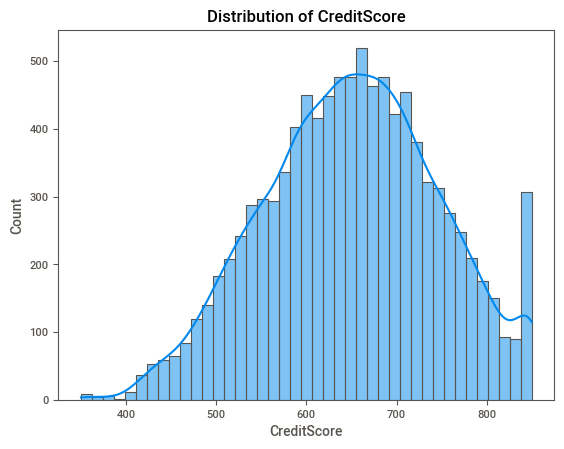

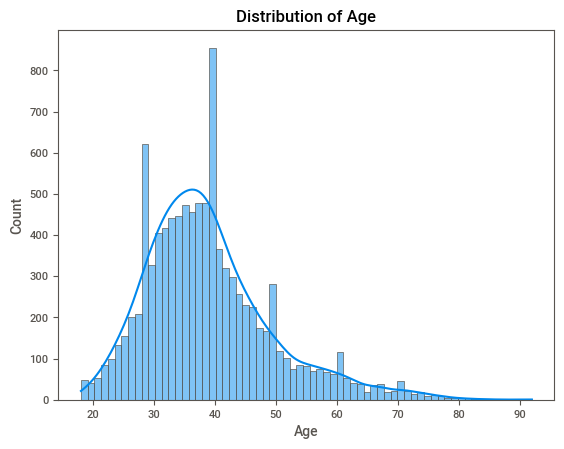

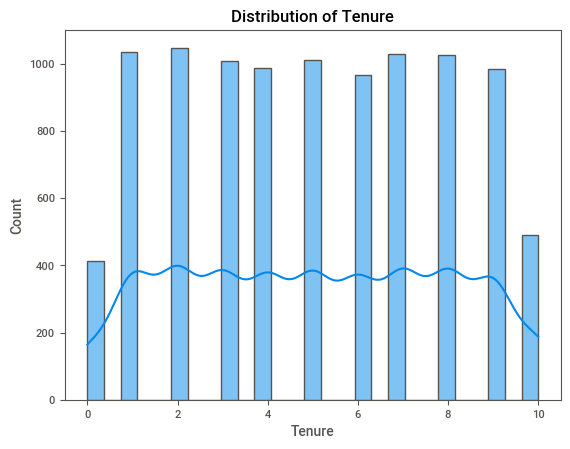

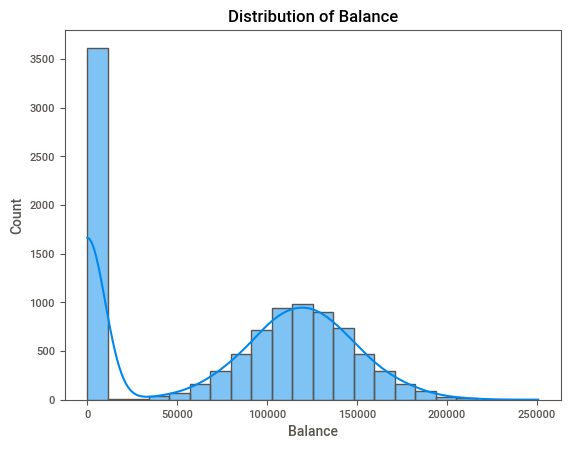

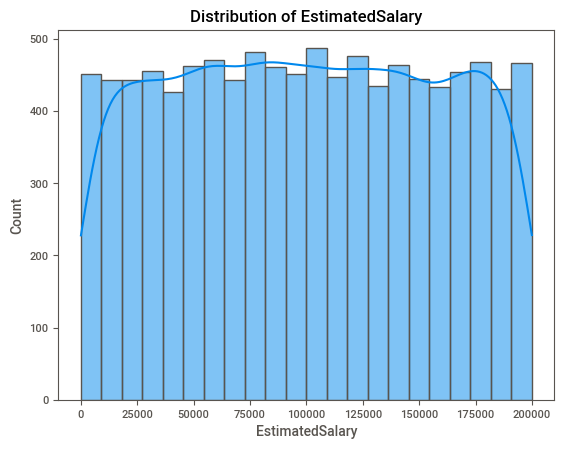

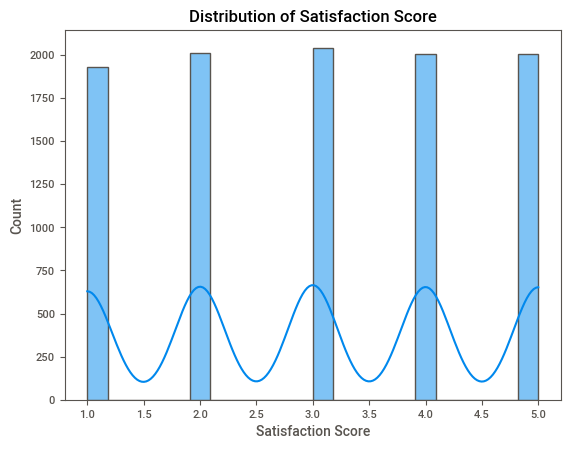

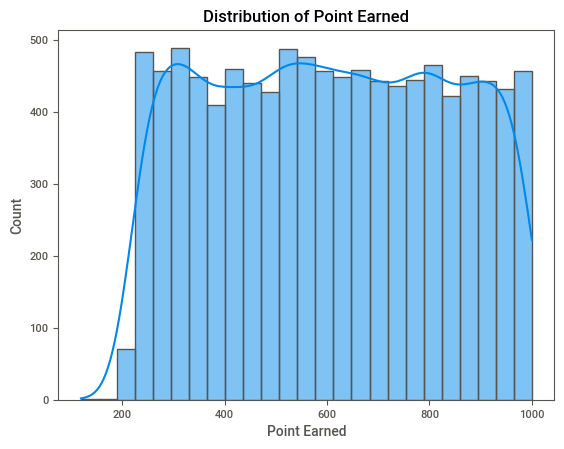

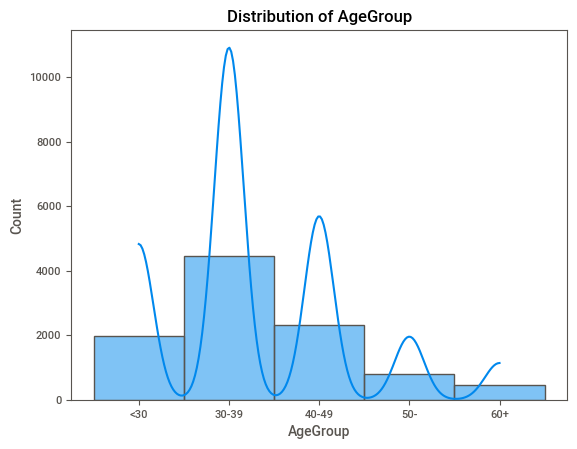

In [111]:
for column in churn.columns:
    if churn[column].nunique()>4:
        plt.figure()
        sns.histplot(churn[column], kde=True)
        plt.title(f'Distribution of {column}')

# Display all the plots
plt.show()

IDENTIFYING AND HANDLING OUTLIERS 

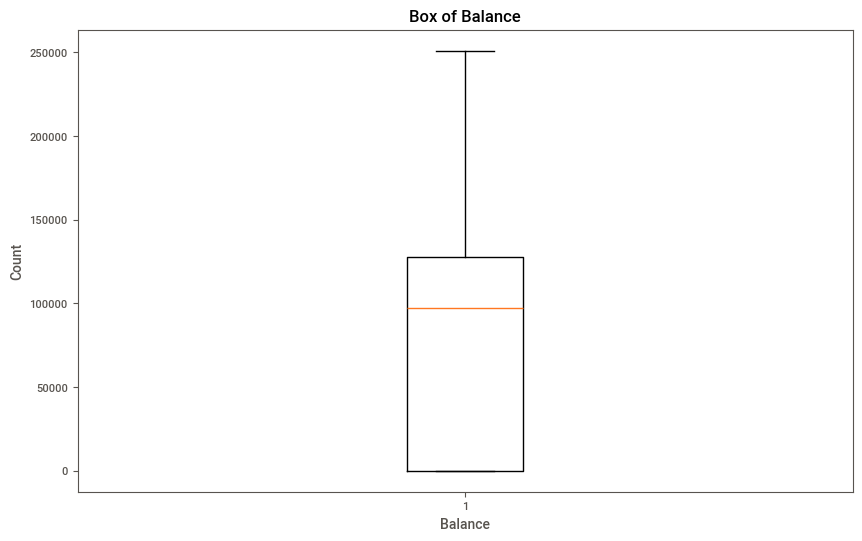

In [52]:
plt.figure(figsize=(10, 6))
plt.boxplot(churn['Balance'])
plt.title('Box of Balance')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.show()
# plt.xlim(list(range(0,0.6)))

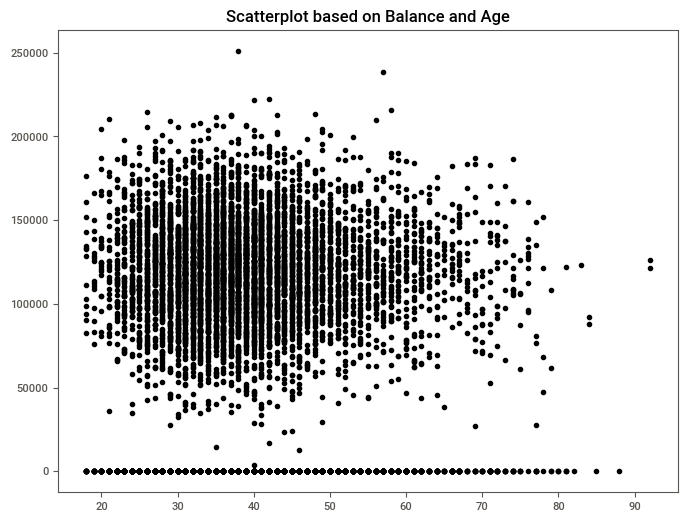

In [54]:
plt.figure(figsize=(8,6))
plt.title('Scatterplot based on Balance and Age')
plt.scatter(churn['Age'], churn['Balance'], c='k')
plt.show()

PRE_PROCESSING, FEATURE SELECTION, AND FEATURE ENGINEERING

In [55]:
churn.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned',
       'AgeGroup'],
      dtype='object')

In [56]:
churn = churn.drop(['Complain', 'Point Earned', 'AgeGroup'], axis = 1)
churn

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3,DIAMOND
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,DIAMOND
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,5,PLATINUM
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,3,SILVER
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,2,GOLD


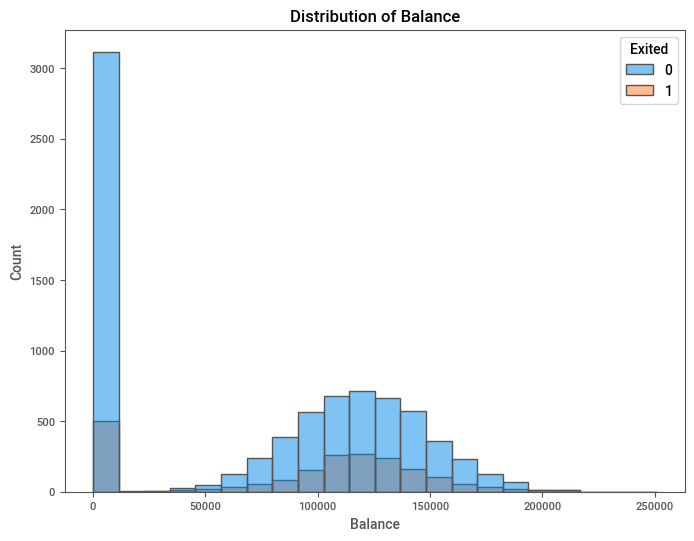

In [57]:
plt.figure(figsize = (8,6))
plt.title('Distribution of Balance')
sns.histplot(data = churn, x = 'Balance', hue = 'Exited')
ax.lines[0].set_color('black')

plt.show()

In [58]:
# # the following columns have been dropped from dataframe:
#  - RowNumber
#  - CustomerId
#  - Surname 
 # - Points Earned
 # - Complain

churn = pd.get_dummies(churn, columns= ['Geography','Gender', 'Card Type'],
                         dtype = int)

In [59]:
X = churn.drop('Exited', axis=1)
y = churn['Exited']

In [60]:
churn.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Satisfaction Score',
       'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male', 'Card Type_DIAMOND', 'Card Type_GOLD',
       'Card Type_PLATINUM', 'Card Type_SILVER'],
      dtype='object')

# LOGISTIC REGRESSION MODEL 

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [65]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
lor = LogisticRegression(class_weight='balanced')

In [68]:
lor.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [69]:
pred = lor.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [71]:
print('Accuracy Score:')

accuracy_score(y_test, pred)

Accuracy Score:


0.7125

In [72]:
print("Classification Report")

print('\n')

print(classification_report(y_test, pred))

Classification Report


              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1586
           1       0.40      0.73      0.51       414

    accuracy                           0.71      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.80      0.71      0.74      2000



In [73]:
print('Confusion Matrix')

print('\n')

print(confusion_matrix(y_test, pred))

Confusion Matrix


[[1121  465]
 [ 110  304]]


In [74]:
print('Accuracy of Model :')

(679+225)/(679+225+98+275)

Accuracy of Model :


0.7079091620986687

In [75]:
print('Precision of Model:')

679/(679+98)

Precision of Model:


0.8738738738738738

In [76]:
print('Recall Score of the Model:')

679/(679+275)

Recall Score of the Model:


0.7117400419287212

In [77]:
precision = 87
recall = 71

f1_score = 2*(precision*recall)/(precision+recall)

In [78]:
print('F1 Score of the Model:')

print(f1_score)

F1 Score of the Model:
78.18987341772151


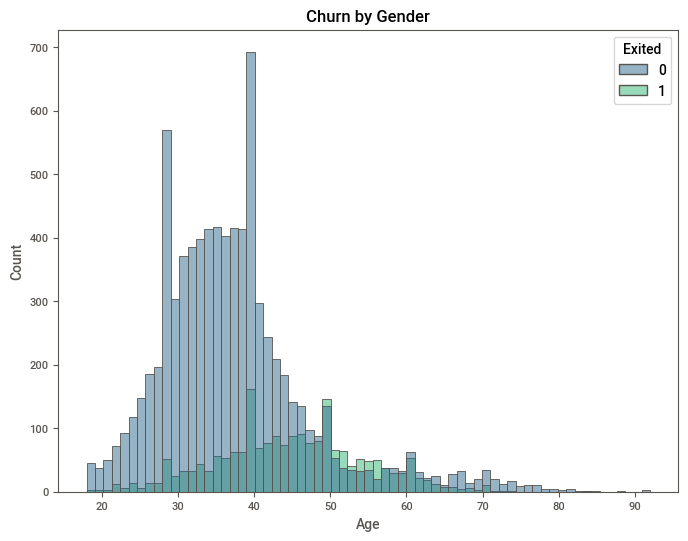

In [79]:
plt.figure(figsize = (8,6))
sns.histplot(data = churn, x = 'Age', hue = 'Exited', palette = 'viridis')
plt.title('Churn by Gender')
plt.show()

In [80]:
for i in churn.columns
    if i.nunique()<4
        plt.subplot(5, 2, 10)
        plt.gca().set_title('Variable Card Type')
        sns.countplot(x = 'Exited', palette = 'Set2', data = df)

SyntaxError: expected ':' (350411145.py, line 1)

<Axes: xlabel='Balance'>

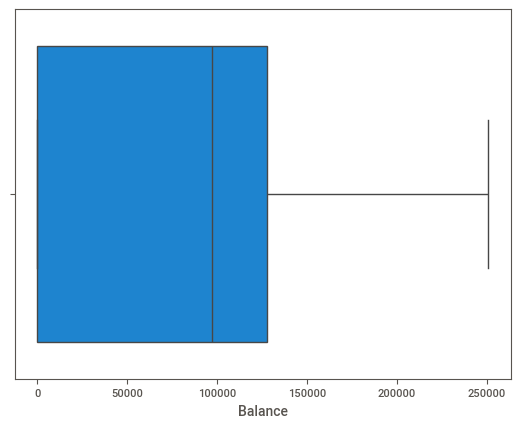

In [81]:
sns.boxplot(x=churn["Balance"])

<Axes: >

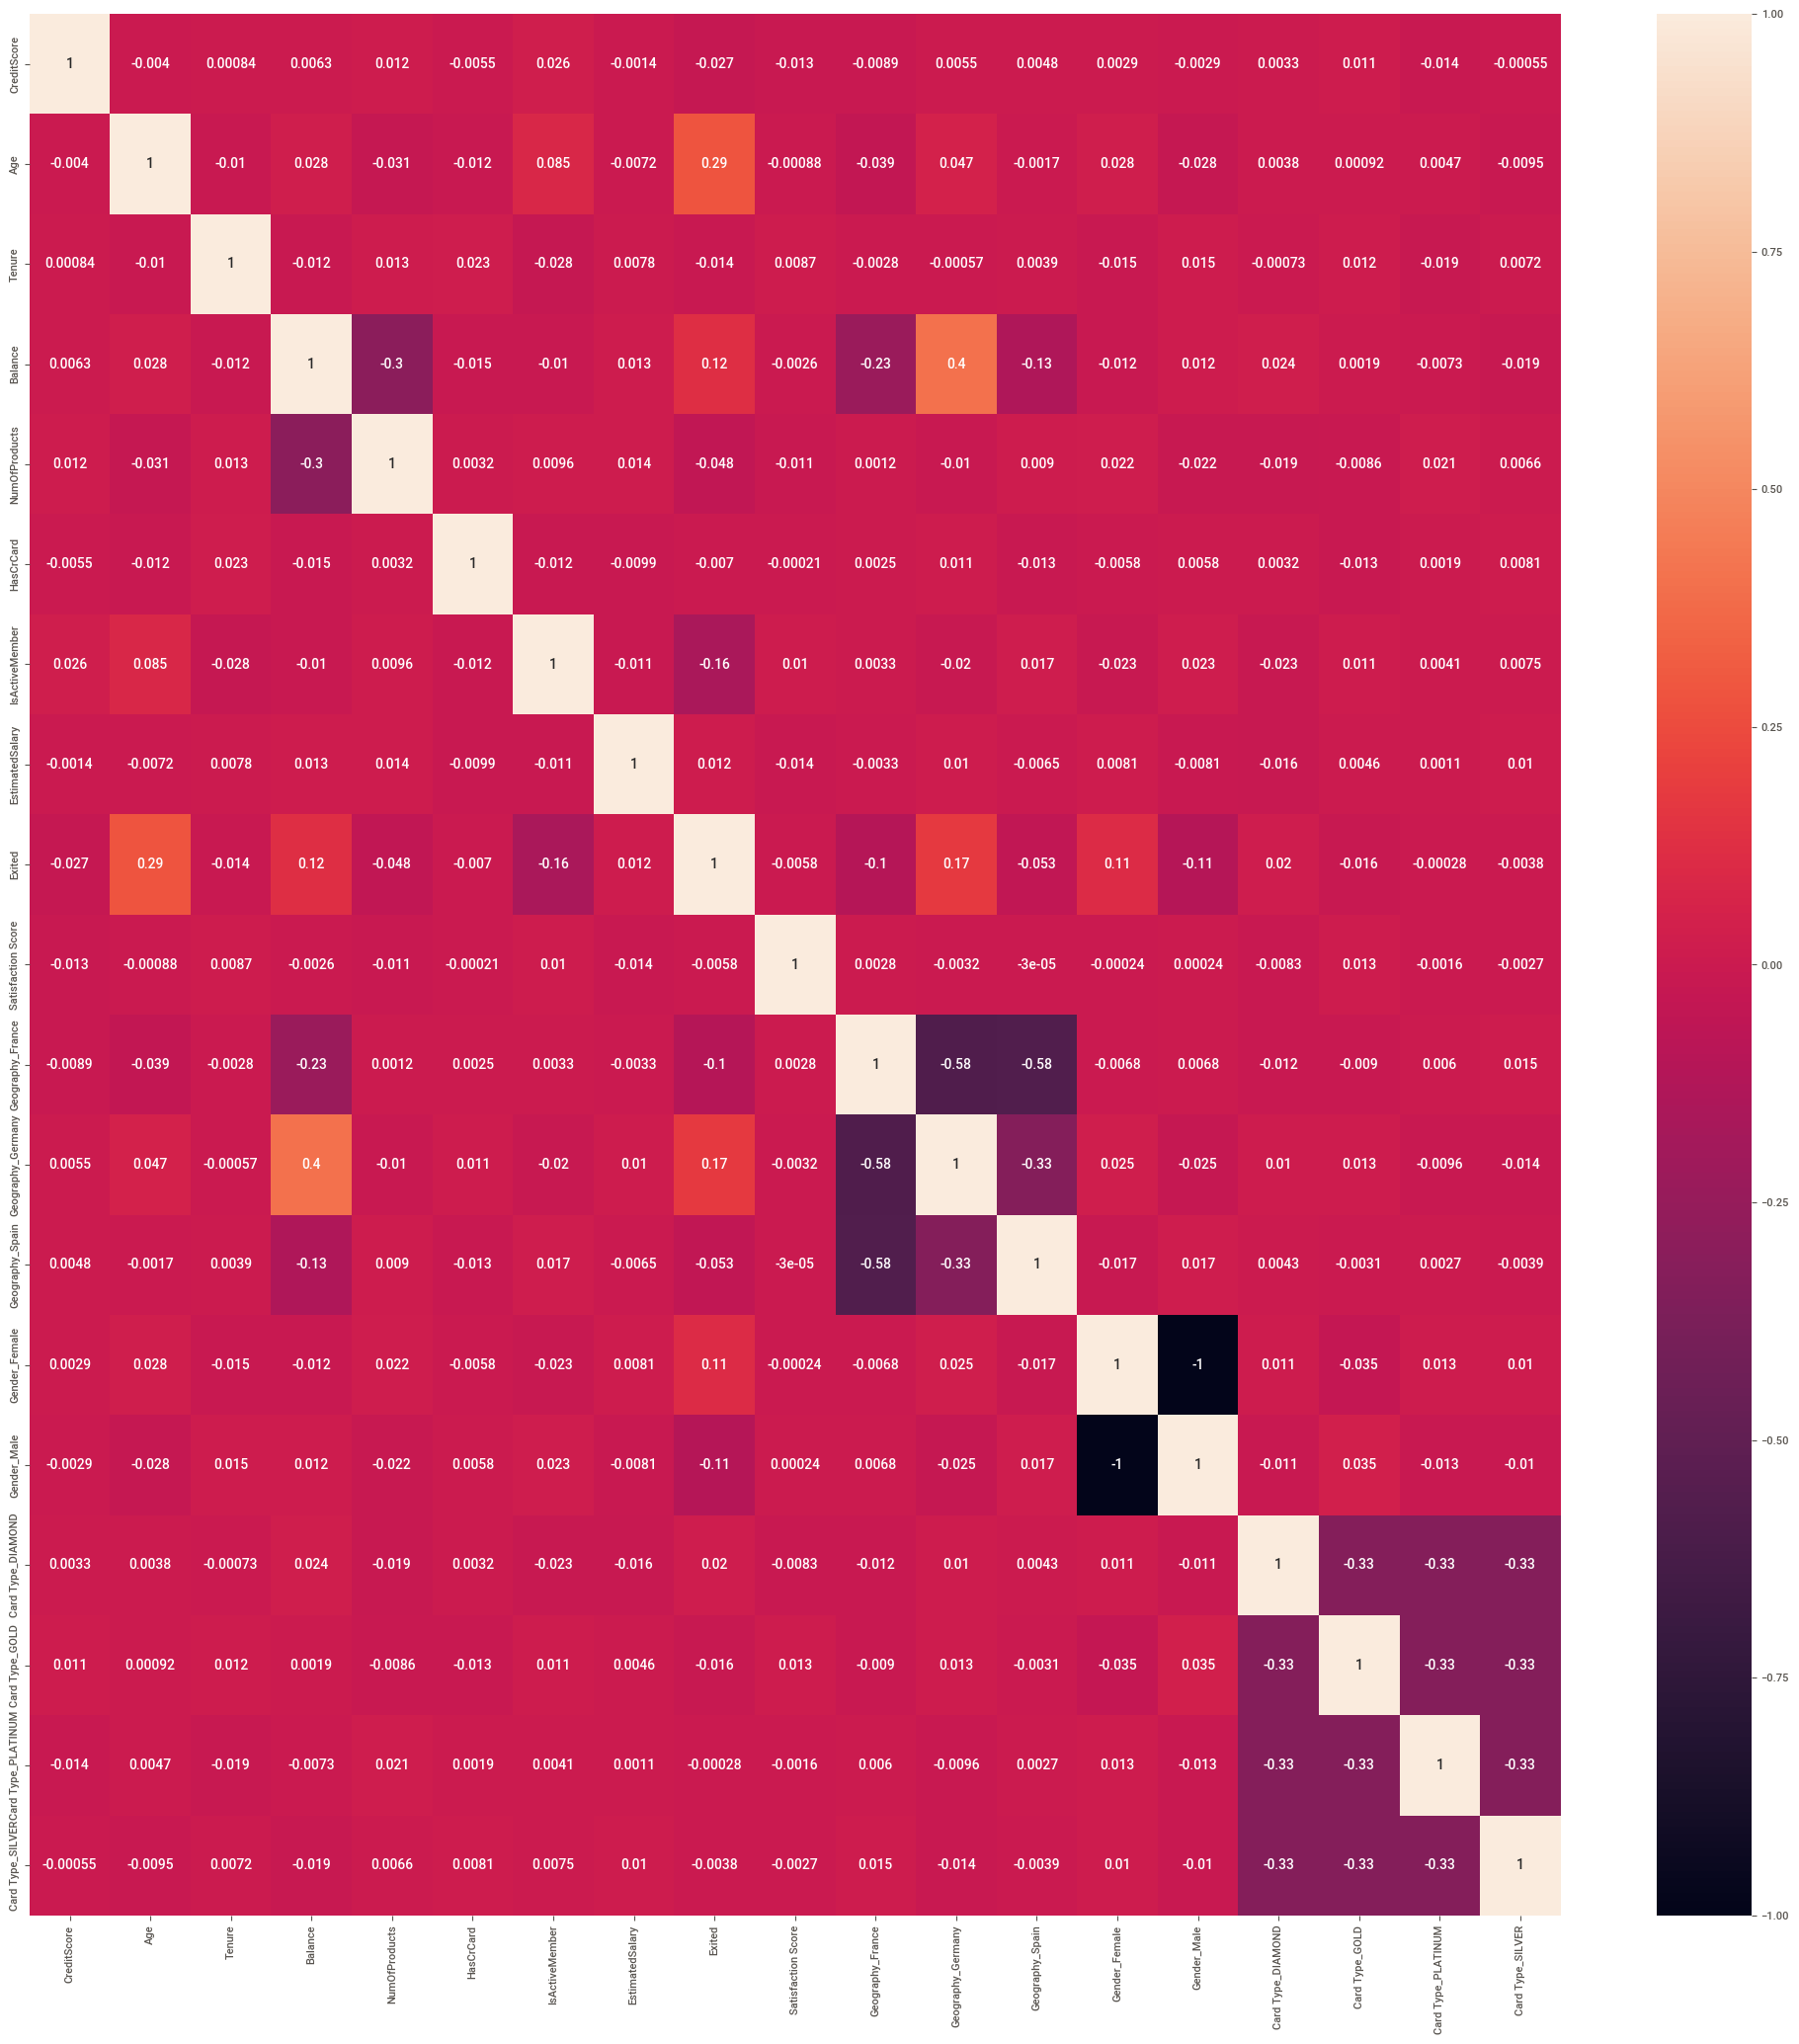

In [82]:
cc = churn.corr(numeric_only=True)

plt.figure(figsize = (25,25))
sns.heatmap(data = cc, annot = True)

In [45]:
churn.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,...,606.515100,0.501400,0.250900,0.247700,0.454300,0.545700,0.250700,0.25020,0.249500,0.249600
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,...,225.924839,0.500023,0.433553,0.431698,0.497932,0.497932,0.433438,0.43315,0.432745,0.432803
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,...,119.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,...,410.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,...,605.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,...,801.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,...,1000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


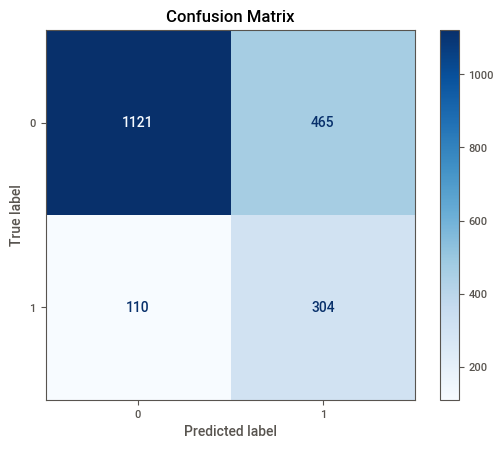

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test is the true labels and y_pred are the predicted labels
y_pred = lor.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

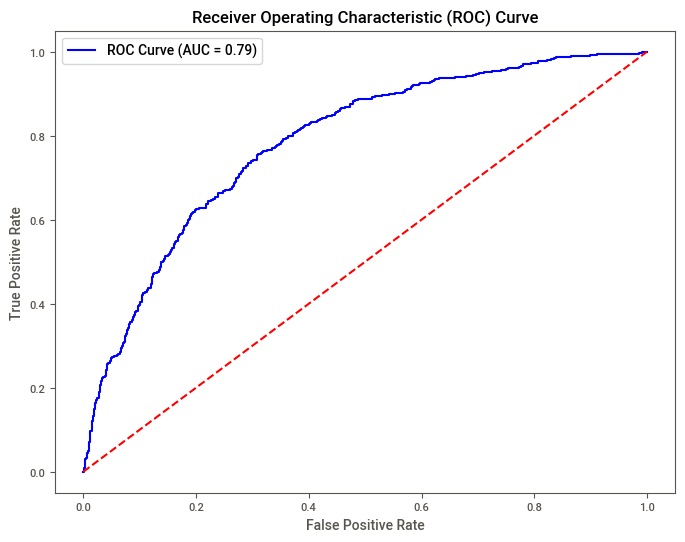

In [84]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming y_test is the true labels and y_pred_prob are the predicted probabilities
y_pred_prob = lor.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

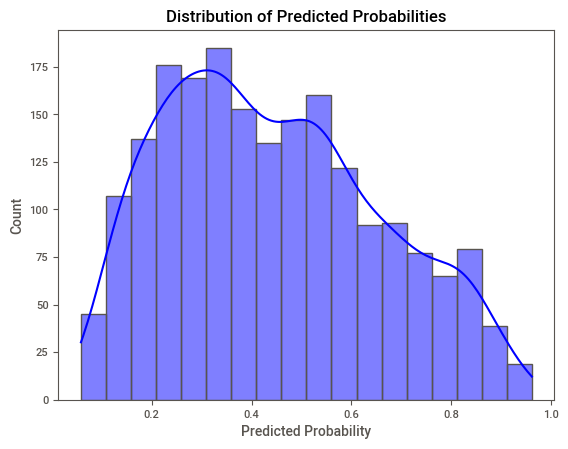

In [87]:
import seaborn as sns

# Assuming y_pred_prob are the predicted probabilities for the positive class
sns.histplot(y_pred_prob, kde=True, color='blue')
plt.xlabel('Predicted Probability')
plt.title('Distribution of Predicted Probabilities')
plt.show()

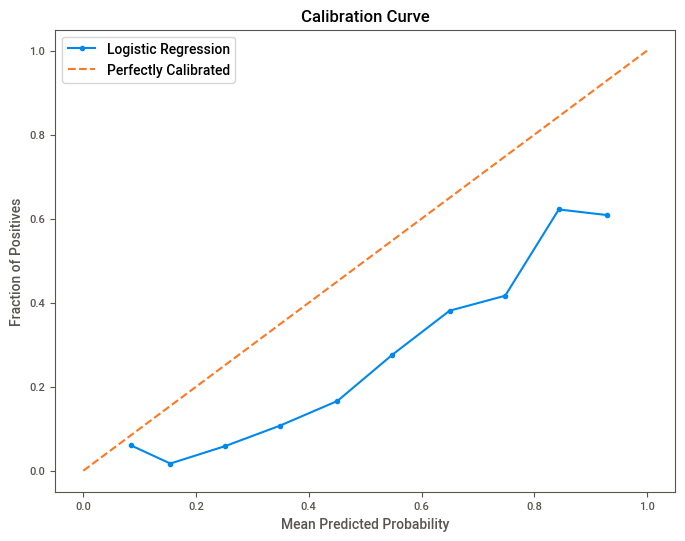

In [88]:
from sklearn.calibration import calibration_curve

# Assuming y_test are the true labels and y_pred_prob are the predicted probabilities
prob_true, prob_pred = calibration_curve(y_test, y_pred_prob, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()

In [93]:
import seaborn as sns

# Assuming X_train is your feature data
corr_matrix = X_train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'corr'

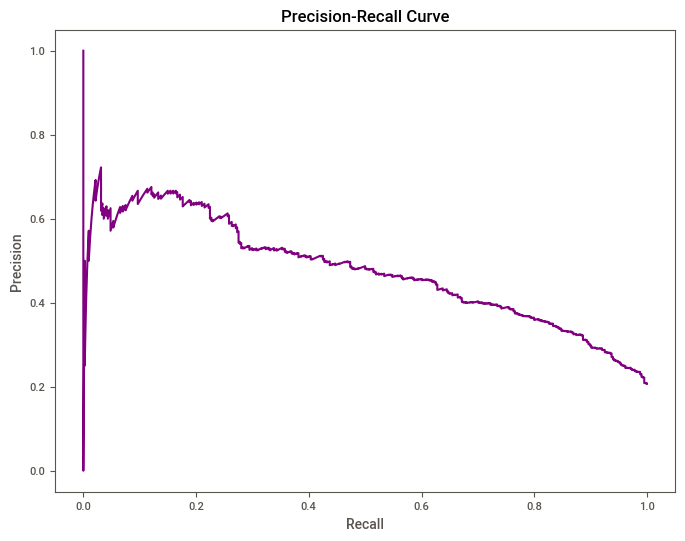

In [94]:
from sklearn.metrics import precision_recall_curve

# Assuming y_test are the true labels and y_pred_prob are the predicted probabilities
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

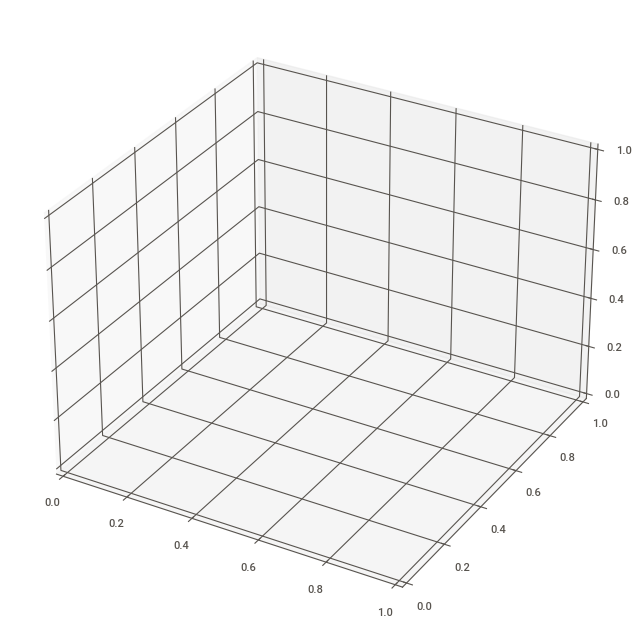

In [95]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming X_train is your feature data and model is your logistic regression model
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Select two features to plot
x1 = X_train.iloc[:, 0]
x2 = X_train.iloc[:, 1]
y_pred = model.predict_proba(X_train)[:, 1]

ax.scatter(x1, x2, y_pred, c=y_pred, cmap='viridis')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Predicted Probability')
plt.title('Feature Interaction Visualization')
plt.show()
